# ipynb Notebook :  Data Sprint 64 - Galactic Astral Identification

### 1) Importing important libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 2) Importing Data

#### Description

In [2]:
df = pd.read_csv("train_dataset.csv")
df.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,240.052313,34.255821,24.01377,23.98592,22.53496,20.97958,19.85996,3965,301,3,70,1.229608e+19,0.000000,10921,58251,465,GALAXY
1,212.817636,43.170697,24.98241,23.00377,21.27729,20.18667,19.58927,3699,301,2,154,6.817392e+18,0.599489,6055,56102,249,GALAXY
2,110.805667,42.794380,19.05334,17.88926,17.17967,16.76607,16.50613,4264,301,5,40,2.099885e+18,0.107371,1865,53312,296,GALAXY
3,349.255747,1.061327,22.66089,22.34669,21.67616,21.12133,20.47592,4188,301,6,38,1.036183e+19,1.104942,9203,57692,617,GALAXY
4,135.267342,33.436172,21.61335,21.29505,20.96795,20.76065,20.40137,3560,301,5,189,1.152722e+19,2.394648,10238,58155,926,QSO


### 3) EDA & PreProcessing
#### Encoding

Now we will use Label Encoder to Encode the 'Species' column in numeric. For eg - the species Iris-setosa is encoded as 0, Iris-virginica as 2 and so on.

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_class = LabelEncoder()
df['class'] = labelencoder_class.fit_transform(df['class'])
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,240.052313,34.255821,24.01377,23.98592,22.53496,20.97958,19.85996,3965,301,3,70,1.229608e+19,0.000000,10921,58251,465,0
1,212.817636,43.170697,24.98241,23.00377,21.27729,20.18667,19.58927,3699,301,2,154,6.817392e+18,0.599489,6055,56102,249,0
2,110.805667,42.794380,19.05334,17.88926,17.17967,16.76607,16.50613,4264,301,5,40,2.099885e+18,0.107371,1865,53312,296,0
3,349.255747,1.061327,22.66089,22.34669,21.67616,21.12133,20.47592,4188,301,6,38,1.036183e+19,1.104942,9203,57692,617,0
4,135.267342,33.436172,21.61335,21.29505,20.96795,20.76065,20.40137,3560,301,5,189,1.152722e+19,2.394648,10238,58155,926,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,125.780427,47.161620,23.34387,21.15009,19.65831,18.73182,18.23208,1331,301,3,148,3.573651e+18,-0.000026,3174,54821,162,2
69996,231.398214,12.963467,23.06853,20.72531,18.99020,18.38258,17.98355,5322,301,5,144,6.183664e+18,0.368779,5492,56010,808,0
69997,215.349636,62.299615,20.31743,18.17908,17.08861,16.62351,16.27979,2078,301,5,193,6.824435e+17,0.141645,606,52365,539,0
69998,347.137617,1.574031,19.98730,19.24359,19.23531,19.08316,18.73940,7717,301,2,243,1.036417e+19,2.350030,9205,57711,968,1


In [4]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.000000,70000.000000,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,177.843720,24.172580,21.935665,20.486743,19.646661,19.086556,18.627244,4478.597557,301.0,3.513300,185.979014,5.787758e+18,0.577371,5140.452486,55589.835400,448.818429,0.621500
std,96.467901,19.681110,37.943097,37.925410,1.856541,1.759330,37.904792,1964.726370,0.0,1.585236,149.108665,3.326536e+18,0.729491,2954.541448,1810.123112,272.318453,0.816782
min,0.010959,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.007352,266.000000,51608.000000,1.000000,0.000000
25%,127.720363,5.155144,20.351965,18.965230,18.133995,17.732590,17.463280,3185.000000,301.0,2.000000,82.000000,2.846328e+18,0.054902,2528.000000,54240.000000,220.000000,0.000000
50%,181.121826,23.687466,22.175910,21.095210,20.127830,19.409350,19.007725,4188.000000,301.0,4.000000,146.000000,5.620625e+18,0.425493,4992.000000,55882.000000,432.000000,0.000000
75%,234.098025,39.988785,23.686590,22.121677,21.045175,20.398108,19.922258,5326.000000,301.0,5.000000,241.000000,8.333968e+18,0.707145,7402.000000,56780.000000,643.000000,1.000000
max,359.999810,83.000519,32.781390,30.607000,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,2.000000


In [5]:
df["rerun_ID"].unique()

array([301], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alpha        70000 non-null  float64
 1   delta        70000 non-null  float64
 2   u            70000 non-null  float64
 3   g            70000 non-null  float64
 4   r            70000 non-null  float64
 5   i            70000 non-null  float64
 6   z            70000 non-null  float64
 7   run_ID       70000 non-null  int64  
 8   rerun_ID     70000 non-null  int64  
 9   cam_col      70000 non-null  int64  
 10  field_ID     70000 non-null  int64  
 11  spec_obj_ID  70000 non-null  float64
 12  redshift     70000 non-null  float64
 13  plate        70000 non-null  int64  
 14  MJD          70000 non-null  int64  
 15  fiber_ID     70000 non-null  int64  
 16  class        70000 non-null  int32  
dtypes: float64(9), int32(1), int64(7)
memory usage: 8.8 MB


In [7]:
df["class"].unique() #number of classes

array([0, 1, 2])

<AxesSubplot:>

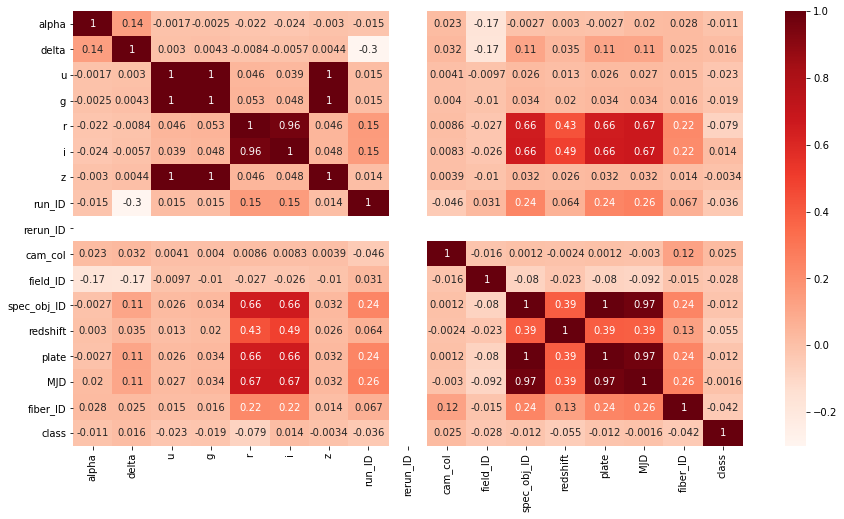

In [8]:
%matplotlib inline
import seaborn as sb
corr = df.corr()
plt.figure(figsize=(15,8))
sb.heatmap(corr, cmap="Reds", annot=True)

<AxesSubplot:xlabel='redshift', ylabel='Count'>

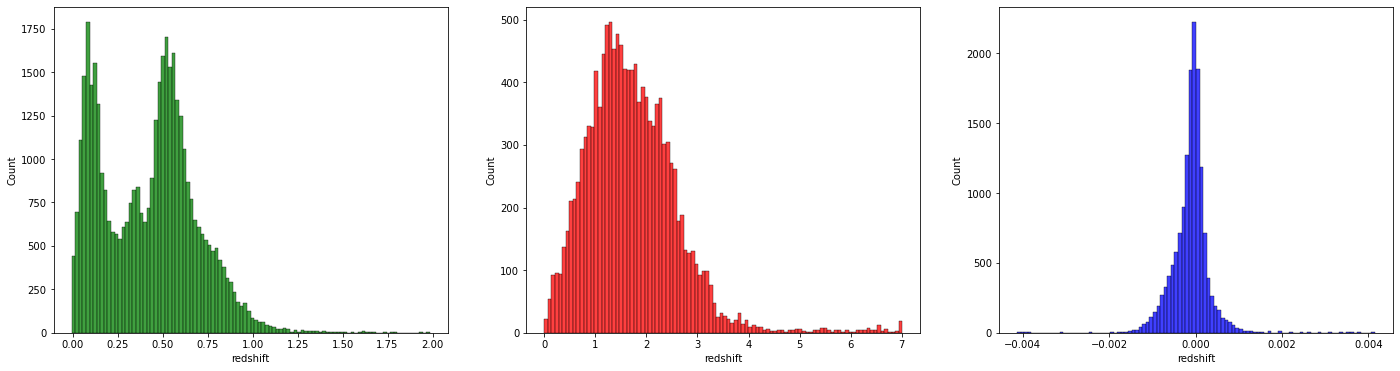

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sb.histplot(df[df['class'] == 0].redshift, ax = ax1, bins = 100, color = 'g')
sb.histplot(df[df['class'] == 1].redshift, ax = ax2, bins = 100, color = 'r')
sb.histplot(df[df['class'] == 2].redshift, ax = ax3, bins = 100, color = 'b')

In [15]:
#separating features and label 
X = df.iloc[:, 0:17]
y = df["class"]
#X = X.drop(["rerun_ID","cam_col", "delta"], axis = 1)
X = X.drop(['spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID'],axis = 1)
X

,alpha,delta,u,g,r,i,z,redshift,plate,MJD,fiber_ID,class
0,240.052313,34.255821,24.01377,23.98592,22.53496,20.97958,19.85996,0.000000,10921,58251,465,0
1,212.817636,43.170697,24.98241,23.00377,21.27729,20.18667,19.58927,0.599489,6055,56102,249,0
2,110.805667,42.794380,19.05334,17.88926,17.17967,16.76607,16.50613,0.107371,1865,53312,296,0
3,349.255747,1.061327,22.66089,22.34669,21.67616,21.12133,20.47592,1.104942,9203,57692,617,0
4,135.267342,33.436172,21.61335,21.29505,20.96795,20.76065,20.40137,2.394648,10238,58155,926,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,125.780427,47.161620,23.34387,21.15009,19.65831,18.73182,18.23208,-0.000026,3174,54821,162,2
69996,231.398214,12.963467,23.06853,20.72531,18.99020,18.38258,17.98355,0.368779,5492,56010,808,0
69997,215.349636,62.299615,20.31743,18.17908,17.08861,16.62351,16.27979,0.141645,606,52365,539,0
69998,347.137617,1.574031,19.98730,19.24359,19.23531,19.08316,18.73940,2.350030,9205,57711,968,1


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
p_data = pca.fit_transform(X[['u', 'g', 'r', 'i', 'z']])

# update dataframe 
X = pd.concat((X, pd.DataFrame(p_data)), axis=1)
X.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
X.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
X.head()

,alpha,delta,redshift,plate,MJD,fiber_ID,class,PCA_1,PCA_2,PCA_3
0,240.052313,34.255821,0.000000,10921,58251,465,0,-3.938458,3.456148,-0.971268
1,212.817636,43.170697,0.599489,6055,56102,249,0,-3.771913,1.873798,-1.627322
2,110.805667,42.794380,0.107371,1865,53312,296,0,4.394800,-3.339706,0.701675
3,349.255747,1.061327,1.104942,9203,57692,617,0,-2.564838,2.935206,0.616580
4,135.267342,33.436172,2.394648,10238,58155,926,1,-1.308080,2.187135,1.397549


### 4) Training and Test data

We will divide the dataset into training and test dataset to see the accuracy of each of the algorithms that we use :

### Stratified Shuffle Split
It is a way of distributing your data in equal percent in Testing and training sets with respect to your classification classes

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.3, random_state= 1)
for train_index, test_index in split.split(X, X["class"]):
    strat_train_set = X.loc[train_index]
    strat_test_set = X.loc[test_index]

In [18]:
X_train = strat_train_set.drop(["class","MJD"], axis = 1)
X_test = strat_test_set.drop(["class","MJD"], axis = 1)
y_train = strat_train_set["class"].copy()
y_test = strat_test_set["class"].copy()

y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train
#X_train = X_train[["redshift"]]
#X_test =  X_test[["redshift"]]

,alpha,delta,redshift,plate,fiber_ID,PCA_1,PCA_2,PCA_3
17899,216.163989,2.179393,0.099099,534,553,3.544446,-2.989488,0.169492
11004,348.930179,34.755922,0.575385,7140,833,-2.266777,1.572417,-0.588321
46134,13.676794,0.911099,-0.000513,3111,524,1.861448,-0.877066,1.398060
3626,220.091549,36.451398,1.530115,10754,829,-2.655954,2.996134,1.586073
48846,185.386377,-1.394532,2.319504,3777,870,-2.905709,3.824466,1.259573
...,...,...,...,...,...,...,...,...
7616,182.773194,54.421379,2.081617,8214,482,-1.897704,3.462673,1.937255
48859,152.172922,29.674328,0.739257,11381,443,-3.043024,2.246029,-0.749110
65023,114.925791,18.809074,0.000169,2890,326,5.581809,-4.406888,0.925890
68483,4.312388,19.533931,2.699213,7592,267,-3.481051,3.289796,1.992141


### 5) K Nearest Neighbour Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
#Predicitng on our test data
y_pred = neigh.predict(X_test)

In [21]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.6864285714285714


### 6) Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters

In [22]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [5,10,100],
            'randomforestclassifier__max_features': ["auto", "sqrt", "log2"]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10],
            'logisticregression__max_iter': [5000]
        }
    },
    'decision tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
              'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
              'decisiontreeclassifier__ccp_alpha': [0.1, .01, .001],
              'decisiontreeclassifier__max_depth' : [5, 6, 7, 8, 9],
              'decisiontreeclassifier__criterion' :['gini', 'entropy']
             }
    },
    'xgboost' : {
        'model': XGBClassifier(),
        'params': {
              'xgbclassifier__max_features': ['auto', 'sqrt', 'log2'],
              'xgbclassifier__ccp_alpha': [0.1, .01, .001],
              'xgbclassifier__max_depth' : [5, 6, 7, 8, 9],
              'xgbclassifier__min_child_weight': [4,6,8,10],
              'xgbclassifier__gamma':[i/10.0 for i in range(0,5)],
              'xgbclassifier__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
        }
      
    }

}

In [23]:
model_params = {

'random_forest': {
    'model': RandomForestClassifier(),
    'params' : {
        'randomforestclassifier__n_estimators': [5,10,100],
        'randomforestclassifier__max_features': ["auto", "sqrt", "log2"]
    }
}
}

In [24]:
from sklearn.preprocessing import MinMaxScaler
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df_md = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_md

,model,best_score,best_params
0,random_forest,0.978,{'randomforestclassifier__max_features': 'log2...


In [25]:
df_md["best_params"].item()

{'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 100}

In [26]:
best_estimators['random_forest'].score(X_test,y_test)

0.9749523809523809

In [27]:
#best_estimators['logistic_regression'].score(X_test,y_test)

In [28]:
#best_estimators['xgboost'].score(X_test,y_test)

In [30]:
#Saving the best classifier in best_clf
best_clf = best_estimators['random_forest']

### Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12272,   178,    33],
       [  311,  3671,     0],
       [    4,     0,  4531]], dtype=int64)

Text(114.0, 0.5, 'Truth')

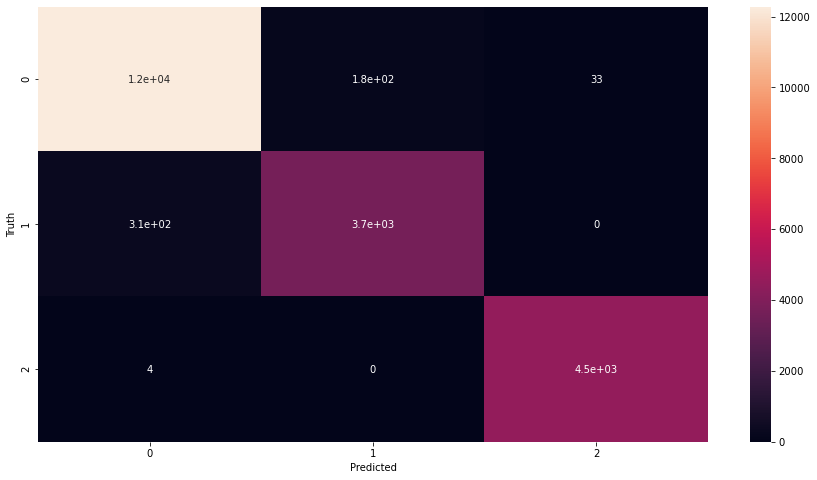

In [34]:
plt.figure(figsize = (15,8))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Making Prediction on the real Testing dataset given 

#### Preparing Test data to be fed to the classifier

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
test_data = pd.read_csv(r'test_dataset.csv')
p_data = pca.fit_transform(test_data[['u', 'g', 'r', 'i', 'z']])

# update dataframe 
test_data = pd.concat((test_data, pd.DataFrame(p_data)), axis=1)
test_data.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
test_data.drop(["field_ID","spec_obj_ID","rerun_ID","cam_col", "run_ID",'u', 'g', 'r', 'i', 'z','MJD'], axis=1, inplace=True)
test_data.head()

,alpha,delta,redshift,plate,fiber_ID,PCA_1,PCA_2,PCA_3
0,125.198792,31.085747,1.340868,10662,858,-1.539509,2.630993,-0.147109
1,178.546633,39.409875,1.185392,1970,6,0.731998,2.122459,-0.151507
2,312.236034,-5.050002,0.000062,1916,596,4.088544,-0.152721,-0.268011
3,151.149160,59.120717,1.416255,8190,670,-2.468960,2.076600,-0.026086
4,232.563937,20.997249,0.350113,2162,220,-0.549005,-3.531207,-1.116615


In [39]:
#test_data = pd.read_csv(r'test_dataset.csv')
#test_data = test_data.drop(["rerun_ID","cam_col", "run_ID"], axis = 1)

In [40]:
target = best_clf.predict(test_data)
target = labelencoder_class.inverse_transform(target)

In [41]:
res = pd.DataFrame(target) 
#preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["class"]
res.to_csv("prediction_results.csv", index = False)   #Saving the predictions to a csv file

### Trying out SVC 

In [42]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [43]:
y_pred = clf.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9595714285714285


## Trying out Neural Network

In [44]:
#importing important libraries
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [46]:
sc = StandardScaler()
x_train = np.array(X_train)
x_train = sc.fit_transform(x_train)
model = Sequential()

#buildig the network architecture
d = x_train.shape[1]
model.add(Dense(24, input_dim=d ,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)
model.fit(x_train, y_train_cat, epochs=15, batch_size= 1000)

Epoch 1/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9689
Epoch 2/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9691
Epoch 3/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9696
Epoch 4/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9691
Epoch 5/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9691
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9694
Epoch 7/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9696
Epoch 8/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9694
Epoch 9/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9692
Epoch 10/15
49/49 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.9694
Epoch 11/15
49/49 [

In [51]:
_, accuracy = model.evaluate(X_train, y_train_cat)
print('Accuracy: %.2f' % (accuracy*100))

1532/1532 [==============================] - 2s 1ms/step - loss: 2439.9480 - accuracy: 0.1922
Accuracy: 19.22


In [52]:
_, accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

657/657 [==============================] - 1s 2ms/step - loss: 2426.7756 - accuracy: 0.1930
Accuracy: 19.30


# Final Conclusion

We are getting an accuracy of more than 97.5 percent which is pretty decent. 
1. Random Forest
2. Logistic Regression
3. Decision Tree
4. SVC
5. KNN
6. Neural Nets